In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import glob

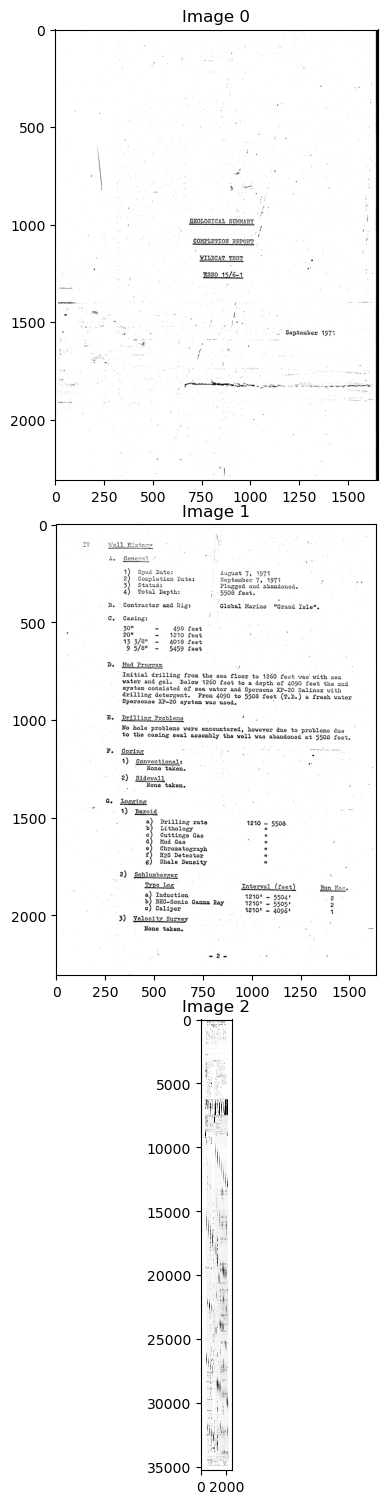

In [3]:
images_test_paths = glob.glob('data/images_to_denoise/*.png')
images_test = [cv2.imread(image_test_path) for image_test_path in images_test_paths]

def plot_images(images, row, col):
    n = len(images)
    fig, axs = plt.subplots(row, col, figsize=(8*n, 5*n))
    fig.tight_layout()
    for i, image in enumerate(images):
        axs[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[i].set_title(f'Image {i}')
    plt.show()


plot_images(images_test, len(images_test), 1)

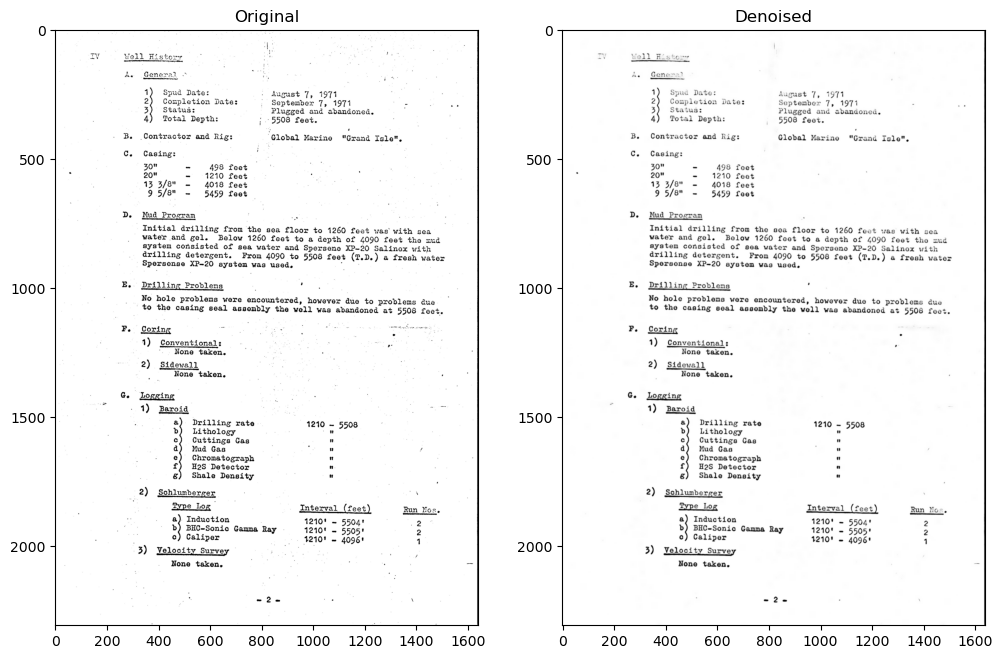

In [5]:
def denoise_image(image: np.ndarray, method: str = 'fastNlMeansDenoising') -> np.ndarray:
    """Denoise image using OpenCV

    Args:
        image_path (str): path to image
        method (str, optional): denoising method. Defaults to 'fastNlMeansDenoising'.

    Returns:
        dst: denoised image
    """
    min_size = min(image.shape[:2])
    if method == 'fastNlMeansDenoising':
        h = int(0.04 * min_size)
        dst = cv2.fastNlMeansDenoising(image, None, h, 7, 21)
    elif method == 'fastNlMeansDenoisingColored':
        dst = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)
    elif method == 'bilateralFilter':
        dst = cv2.bilateralFilter(image, 9, 75, 75)
    elif method == 'medianBlur':
        dst = cv2.medianBlur(image, 5)
    elif method == 'GaussianBlur':
        dst = cv2.GaussianBlur(image, (5, 5), 0)
    elif method == 'blur':
        dst = cv2.blur(image, (5, 5))
    else:
        raise ValueError(f'Unknown method: {method}')
    return dst

idx = 1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15 * 0.8, 10 * 0.8))
ax1.imshow(cv2.cvtColor(images_test[idx], cv2.COLOR_BGR2RGB))
ax1.set_title('Original')
ax2.imshow(cv2.cvtColor(denoise_image(images_test[idx], 'fastNlMeansDenoising'), cv2.COLOR_BGR2RGB))
ax2.set_title('Denoised')
plt.show()

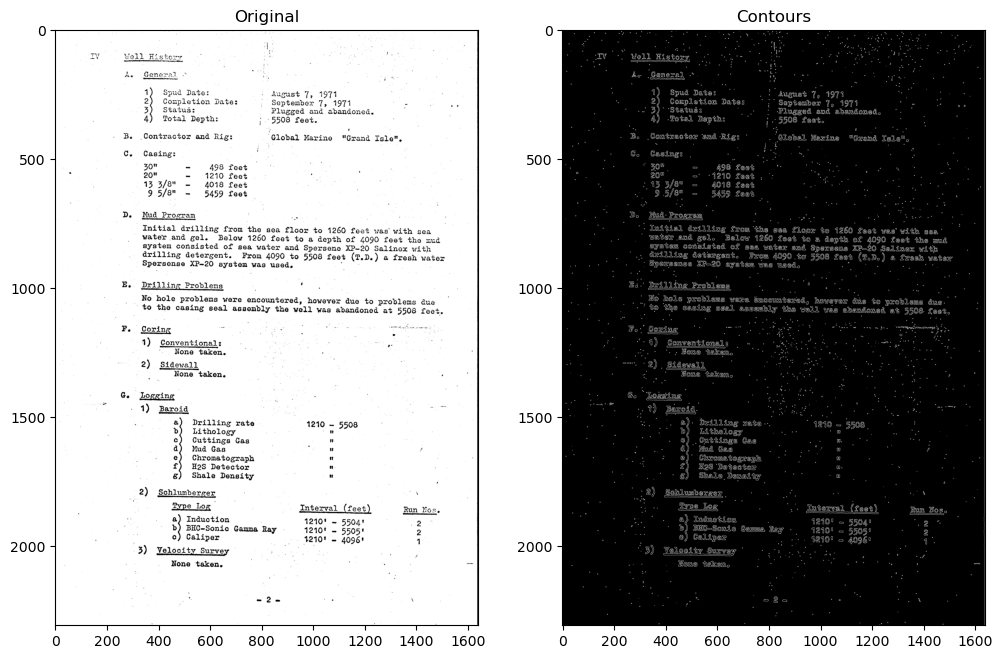

In [15]:
# détection des contours

def detect_contours(image: np.ndarray, method: str = 'Canny') -> np.ndarray:
    """Detect contours using OpenCV

    Args:
        image (np.ndarray): image
        method (str, optional): method to detect contours. Defaults to 'Canny'.

    Returns:
        np.ndarray: image with contours
    """
    if method == 'Canny':
        edges = cv2.Canny(image, 50, 100)
    elif method == 'Laplacian':
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        edges = cv2.Laplacian(gray, cv2.CV_8U, ksize=5)
    elif method == 'Sobel':
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        edges = cv2.Sobel(gray, cv2.CV_8U, 1, 0, ksize=5)
    else:
        raise ValueError(f'Unknown method: {method}')
    return edges

idx = 1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15 * 0.8, 10 * 0.8))
ax1.imshow(cv2.cvtColor(images_test[idx], cv2.COLOR_BGR2RGB))
ax1.set_title('Original')
ax2.imshow(detect_contours(images_test[idx], 'Canny'), cmap='gray')
ax2.set_title('Contours')
plt.show()